In [20]:
import pandas as pd

df = pd.read_parquet('../data/lending_club_case_train_dataset_cleaned.parquet')

In [21]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,hardship_flag,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,default
0,5000,5000,36,0.106506,162.87500,10+ years,RENT,24000.0,Verified,2011-12-01,...,N,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,N,0.0
1,2500,2500,60,0.152710,59.84375,< 1 year,RENT,30000.0,Source Verified,2011-12-01,...,N,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,N,1.0
2,2400,2400,36,0.159546,84.31250,10+ years,RENT,12252.0,Not Verified,2011-12-01,...,N,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,N,0.0
3,10000,10000,36,0.134888,339.25000,10+ years,RENT,49200.0,Source Verified,2011-12-01,...,N,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,N,0.0
4,3000,3000,60,0.126953,67.81250,1 year,RENT,80000.0,Source Verified,2011-12-01,...,N,-1,-1.0,-1,-1,-1.0,-1.0,-1.0,N,0.0


In [22]:
df = df.dropna(subset=['default'])

In [23]:
df['default'] = df['default'].astype(int)

In [24]:
df['time_of_banking_days'] = (df['issue_d'] - df['earliest_cr_line']).dt.days

In [25]:
df['time_of_banking_months'] = (df['issue_d'].dt.year - df['earliest_cr_line'].dt.year) * 12 + (df['issue_d'].dt.month - df['earliest_cr_line'].dt.month)

In [26]:
print(df['time_of_banking_months'])

0          323
1          152
2          121
3          190
4          191
          ... 
2925487    264
2925488    283
2925489    287
2925490    323
2925491    233
Name: time_of_banking_months, Length: 1583646, dtype: int32


In [40]:
df_train['default'].value_counts(normalize=True)

default
0    0.809375
1    0.190625
Name: proportion, dtype: float64

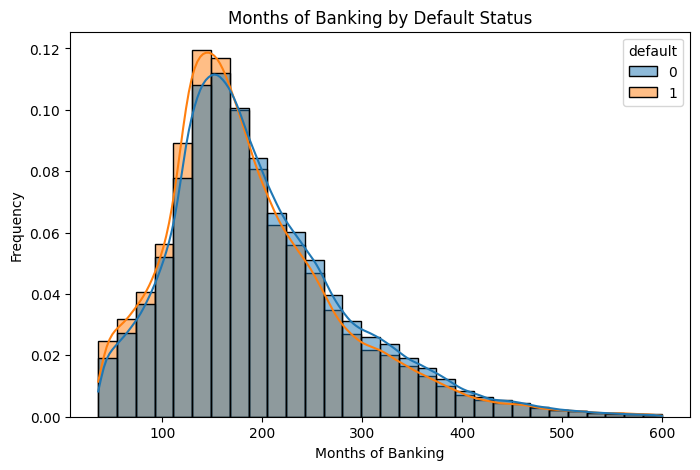

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Use hue to color based on the "default" column
sns.histplot(df[df['time_of_banking_months']<= 600], x='time_of_banking_months', hue='default', bins=30, kde=True, alpha=0.5,stat='probability', common_norm=False)

# Labels and title
plt.xlabel('Months of Banking')
plt.ylabel('Frequency')
plt.title('Months of Banking by Default Status')

plt.show()

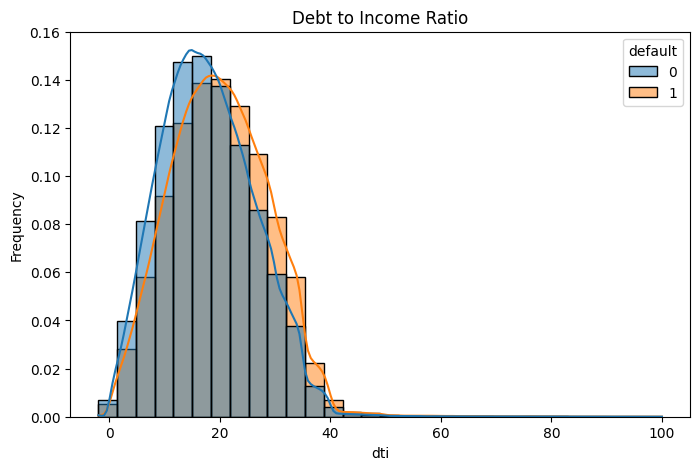

In [29]:
plt.figure(figsize=(8, 5))

# Use hue to color based on the "default" column
sns.histplot(df[df['dti']<=100], x='dti', hue='default', bins=30, kde=True, alpha=0.5,stat='probability', common_norm=False)

# Labels and title
plt.xlabel('dti')
plt.ylabel('Frequency')
plt.title('Debt to Income Ratio')

plt.show()

In [30]:
# Create pivot table with normalized proportions
delinquency_pivot_table = pd.crosstab(df['delinq_2yrs'], df['default'], normalize='index')

# Display table
print(delinquency_pivot_table)

plt.show()

default             0         1
delinq_2yrs                    
0            0.812180  0.187820
1            0.802475  0.197525
2            0.793699  0.206301
3            0.783801  0.216199
4            0.783917  0.216083
5            0.779871  0.220129
6            0.792440  0.207560
7            0.770093  0.229907
8            0.787975  0.212025
9            0.775717  0.224283
10           0.782178  0.217822
11           0.771218  0.228782
12           0.736842  0.263158
13           0.760331  0.239669
14           0.744681  0.255319
15           0.825397  0.174603
16           0.714286  0.285714
17           0.684211  0.315789
18           0.791667  0.208333
19           0.705882  0.294118
20           0.785714  0.214286
21           0.600000  0.400000
22           1.000000  0.000000
24           1.000000  0.000000
25           0.500000  0.500000
26           1.000000  0.000000
27           0.000000  1.000000
28           1.000000  0.000000
29           1.000000  0.000000
30      

In [31]:
# # Reset index for plotting
# # Filter the pivot table to keep only delinq_2yrs values up to 20
# delinquency_pivot_table = delinquency_pivot_table[delinquency_pivot_table['delinq_2yrs'] <= 20]

# #delinquency_pivot_table.reset_index(inplace=True)

# # Line chart for better trend visualization
# plt.figure(figsize=(8, 5))
# plt.plot(delinquency_pivot_table['delinq_2yrs'], delinquency_pivot_table[0], marker='o', linestyle='-', label='Default = 0')
# plt.plot(delinquency_pivot_table['delinq_2yrs'], delinquency_pivot_table[1], marker='s', linestyle='--', label='Default = 1')

# # Labels and title
# plt.xlabel('Delinquencies in 2 Years')
# plt.ylabel('Proportion of Defaults')
# plt.title('Distribution of Default by Delinquencies (delinq_2yrs)')
# plt.legend(title='Default')
# plt.grid(True, linestyle='--', alpha=0.7)

# plt.show()


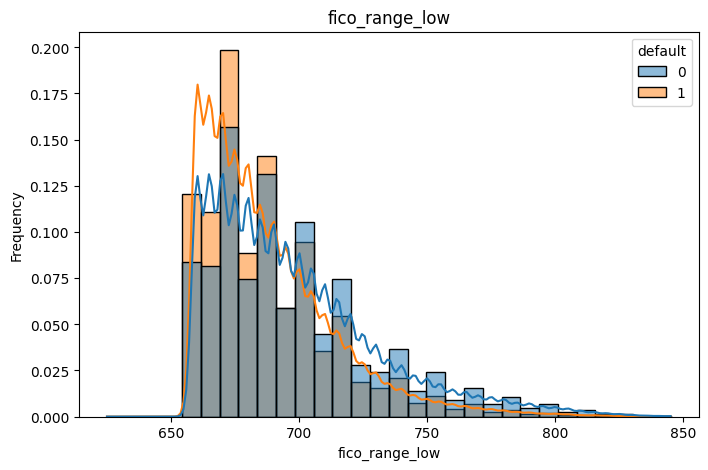

In [32]:
plt.figure(figsize=(8, 5))

# Use hue to color based on the "default" column
sns.histplot(df, x='fico_range_low', hue='default', bins=30, kde=True, alpha=0.5,stat='probability', common_norm=False)

# Labels and title
plt.xlabel('fico_range_low')
plt.ylabel('Frequency')
plt.title('fico_range_low')

plt.show()

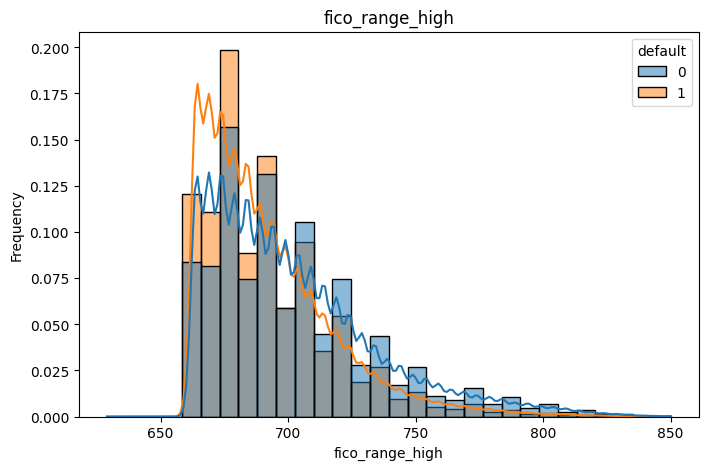

In [33]:
plt.figure(figsize=(8, 5))

# Use hue to color based on the "default" column
sns.histplot(df, x='fico_range_high', hue='default', bins=30, kde=True, alpha=0.5,stat='probability', common_norm=False)

# Labels and title
plt.xlabel('fico_range_high')
plt.ylabel('Frequency')
plt.title('fico_range_high')

plt.show()

In [34]:
# Create pivot table with normalized proportions
inqueries_pivot_table = pd.crosstab(df['inq_last_6mths'], df['default'], normalize='index')

# Display table
print(inqueries_pivot_table)

plt.show()

default                0         1
inq_last_6mths                    
-1              1.000000  0.000000
0               0.829710  0.170290
1               0.793668  0.206332
2               0.765948  0.234052
3               0.742668  0.257332
4               0.726895  0.273105
5               0.722109  0.277891
6               0.761506  0.238494
7               0.750000  0.250000
8               0.818182  0.181818


In [80]:
df['emp_length'] = df['emp_length'].str.replace(' years', '').str.replace(' year', '').str.replace('< 1', '0').str.replace('+', '').astype(float)

In [81]:
df_train = df[['time_of_banking_months',
                'dti',
                'delinq_2yrs', 
                'fico_range_low',
                'fico_range_high',
                'inq_last_6mths',
                'funded_amnt',
                'emp_length',
                'purpose',
                'home_ownership',
                'annual_inc',
                'default']].copy()

XGBoost Classifier como Baseline da Log Loss

CatBoost Classifier

Log Loss: 0.4574
PR AUC: 0.3123


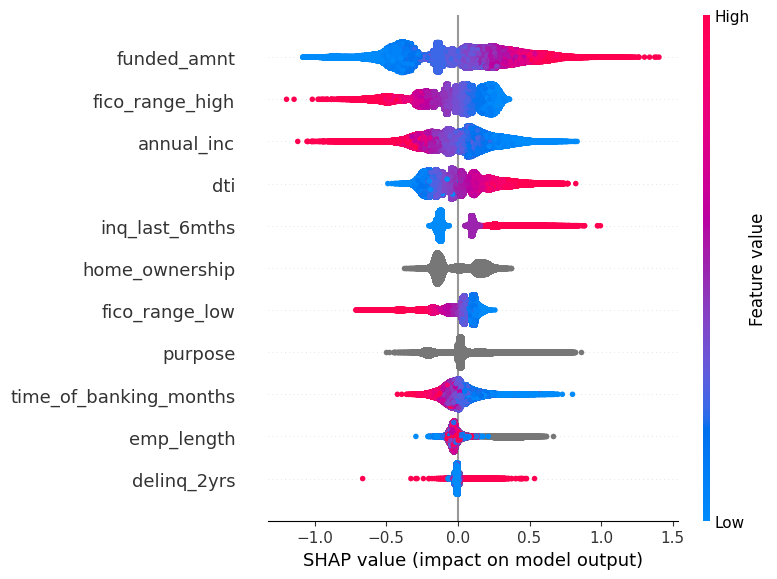

In [83]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, average_precision_score

# Load dataset (replace this with your actual DataFrame)
# df = pd.read_csv("your_data.csv")

# Features & Target
features = ['time_of_banking_months',
            'dti',
            'delinq_2yrs', 
            'fico_range_low',
            'fico_range_high',
            'inq_last_6mths',
            'funded_amnt',
            'emp_length',
            'purpose',
            'home_ownership',
            'annual_inc']
target = 'default'

# Drop rows with missing target values
df_train = df_train.dropna(subset=[target])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size=0.2, random_state=42)

cat_features = list(X_train.select_dtypes(include=['category']).columns)

X_train[cat_features] = X_train[cat_features].astype(str).fillna('missing')

X_test[cat_features] = X_test[cat_features].astype(str).fillna('missing')

# Initialize and train CatBoost classifier
model = CatBoostClassifier(iterations=500, 
                           learning_rate=0.1, 
                           depth=6, verbose=0, 
                           cat_features = cat_features, 
                           random_state=42,
                           early_stopping_rounds=50)
model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate model
logloss = log_loss(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

print(f"Log Loss: {logloss:.4f}")
print(f"PR AUC: {pr_auc:.4f}")

# SHAP Analysis
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

Baseline
Log Loss: 0.4584
PR AUC: 0.2955
iterations=500, learning_rate=0.1, depth=6, verbose=0

In [84]:
best_params = None

In [87]:
import optuna

# Types for tuning hipeparameters: https://www.linkedin.com/posts/timurbikmukhametov_9-practical-tips-for-tuning-gradient-boosting-activity-7285985903984955392-IRHR?utm_source=share&utm_medium=member_desktop
def objective(trial):
    params = {
        'iterations': trial.suggest_categorical('iterations', [300, 500, 750, 1000,1500]),
        'max_depth': trial.suggest_int('depth', 4, 12),
        'early_stopping_rounds': 50,
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-2, 10, log=True),  # Regularization
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),  # Regularization
        'random_strength': trial.suggest_float('random_strength', 1e-9, 10, log=True),  # Reducing overfitting
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.5, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'auto_class_weights': trial.suggest_categorical('auto_class_weights', ['None', 'Balanced', 'SqrtBalanced']),
        'verbose': 0,
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True)
    }

    model = CatBoostClassifier(**params)
    model.fit(
    X_train, y_train,
    cat_features=cat_features,  # ✅ Make sure this list is correct
    eval_set=(X_test, y_test),
    early_stopping_rounds=50
    )

    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Evaluate model
    logloss = log_loss(y_test, y_pred_proba)
    pr_auc = average_precision_score(y_test, y_pred_proba)

    return logloss + (1 - pr_auc) # Minimize logloss while maximizing PR-AUC

study = optuna.create_study(direction='minimize',
                            sampler=optuna.samplers.TPESampler(), 
                            pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))

print('Tuning the model...')
study.optimize(objective, timeout=3600, n_trials=None)

best_params = study.best_params
print(f'Best parameters: {best_params}')

[I 2025-02-08 20:09:24,008] A new study created in memory with name: no-name-4600e2aa-b8e4-41e9-be24-58f5f8e39bcb


Tuning the model...


[I 2025-02-08 20:10:09,320] Trial 0 finished with value: 1.1898299645465211 and parameters: {'iterations': 750, 'depth': 9, 'l2_leaf_reg': 0.27303833376510284, 'bagging_temperature': 0.8249627429423136, 'random_strength': 2.972349916869589e-08, 'colsample_bylevel': 0.8115630506982976, 'subsample': 0.9131713552862375, 'auto_class_weights': 'SqrtBalanced', 'learning_rate': 0.10860131065820187}. Best is trial 0 with value: 1.1898299645465211.
[I 2025-02-08 20:12:21,232] Trial 1 finished with value: 1.1916429044150496 and parameters: {'iterations': 1500, 'depth': 12, 'l2_leaf_reg': 0.027762747167651543, 'bagging_temperature': 0.12394843566005587, 'random_strength': 0.0024569850278421904, 'colsample_bylevel': 0.9581653860970426, 'subsample': 0.5166118847054173, 'auto_class_weights': 'SqrtBalanced', 'learning_rate': 0.012067382119735083}. Best is trial 0 with value: 1.1898299645465211.
[I 2025-02-08 20:13:31,984] Trial 2 finished with value: 1.1470146204925626 and parameters: {'iterations': 

Best parameters: {'iterations': 1500, 'depth': 4, 'l2_leaf_reg': 0.7391028822450243, 'bagging_temperature': 0.16618389413393725, 'random_strength': 4.873630948059184e-09, 'colsample_bylevel': 0.7209378926857175, 'subsample': 0.7633921433253112, 'auto_class_weights': 'None', 'learning_rate': 0.1236784626681265}


In [89]:
df_results = study.trials_dataframe(attrs=("number", "value", "params", "user_attrs"))
print(df_results)

    number     value params_auto_class_weights  params_bagging_temperature  \
0        0  1.189830              SqrtBalanced                    0.824963   
1        1  1.191643              SqrtBalanced                    0.123948   
2        2  1.147015                      None                    0.340811   
3        3  1.336223                  Balanced                    0.769038   
4        4  1.334939                  Balanced                    0.332598   
5        5  1.356114                  Balanced                    0.515330   
6        6  1.151055                      None                    0.737403   
7        7  1.336670                  Balanced                    0.729365   
8        8  1.164651                      None                    0.685609   
9        9  1.343850                  Balanced                    0.022933   
10      10  1.145418                      None                    0.304217   
11      11  1.146094                      None                  